**Description**: This page document the exploration of stats.nba.com by accessing its various informaiton. 
**Selected API**:
    * carrer stats summary: 
        * url: 'http://stats.nba.com/stats/playercareerstats?LeagueID=00&PerMode=PerGame&PlayerID=893'
        * parameters: ['PlayerID']
        * return format: json data
    * player bioinformation: 
        * url: 'http://stats.nba.com/stats/commonplayerinfo?LeagueID=00&PlayerID=893&SeasonType=Regular+Season'
        * parameter(s): ['PlayerID']
        * return format: json
    * player award:
        * url: 'http://stats.nba.com/stats/playerawards?PlayerID=893'
        * parameter(s): ['PlayerID']
        * return format: json
    * complete list of users
        * url: 'http://stats.nba.com/stats/commonallplayers?IsOnlyCurrentSeason=0&LeagueID=00&Season=1993-94'
        * parameter(s): ['Season']
        * paraemters

In [15]:
import re
import requests
from bs4 import BeautifulSoup
import scrapy
import pandas as pd
import matplotlib.pyplot as plt
from lxml import html

%matplotlib inline

* figure out the stats.nba.com parameters of API 
* what parameters and their possible value

In [4]:
jh_url = 'http://stats.nba.com/player/#!/201935/traditional/?Season=2013-14&SeasonType=Regular%20Season'
base_url = 'http://stats.nba.com/player/#!/{playerid}/traditional/?Season={season}&SeasonType={seasontype}'
# 201935 ---> playerid
# traditional
# '2016-17' --> season 
# Regular%20Season --> searontype: ['Regular%20Season', 'Playoffs']

In [10]:
params = {'playerid': str(201935), 'season': '2016-17', 'seasontype': 'Regular%20Season'}
base_url.format(playerid=params['playerid'], season=params['season'], seasontype=params['seasontype'])

'http://stats.nba.com/player/#!/201935/traditional/?Season=2016-17&SeasonType=Regular%20Season'

** description **: this is player's season-wise statistics information

In [40]:
# http://stats.nba.com/stats/playercareerstats?LeagueID=00&PerMode=PerGame&PlayerID=202322
wall_url = 'http://stats.nba.com/stats/playercareerstats?LeagueID=00&PerMode=PerGame&PlayerID=202322'
mj_url = 'http://stats.nba.com/stats/playercareerstats?LeagueID=00&PerMode=PerGame&PlayerID=893'
# 983: playerid
page = requests.get(mj_url)
page

<Response [200]>

In [41]:
soup.find_all('table')

[]

In [38]:
import json
page.content
# json.loads(str(page.content))

b'{"resource":"playercareerstats","parameters":{"PerMode":"PerGame","PlayerID":202322,"LeagueID":"00"},"resultSets":[{"name":"SeasonTotalsRegularSeason","headers":["PLAYER_ID","SEASON_ID","LEAGUE_ID","TEAM_ID","TEAM_ABBREVIATION","PLAYER_AGE","GP","GS","MIN","FGM","FGA","FG_PCT","FG3M","FG3A","FG3_PCT","FTM","FTA","FT_PCT","OREB","DREB","REB","AST","STL","BLK","TOV","PF","PTS"],"rowSet":[[202322,"2010-11","00",1610612764,"WAS",20.0,69,64,37.8,5.8,14.1,0.409,0.5,1.7,0.296,4.4,5.7,0.766,0.5,4.1,4.6,8.3,1.8,0.5,3.8,2.5,16.4],[202322,"2011-12","00",1610612764,"WAS",21.0,66,66,36.2,5.7,13.5,0.423,0.0,0.6,0.071,4.8,6.1,0.789,0.7,3.8,4.5,8.0,1.4,0.9,3.9,2.1,16.3],[202322,"2012-13","00",1610612764,"WAS",22.0,49,42,32.7,6.6,15.0,0.441,0.2,0.9,0.267,5.0,6.2,0.804,0.7,3.3,4.0,7.6,1.3,0.8,3.2,2.4,18.5],[202322,"2013-14","00",1610612764,"WAS",23.0,82,82,36.3,7.1,16.3,0.433,1.3,3.8,0.351,3.9,4.8,0.805,0.5,3.6,4.1,8.8,1.8,0.5,3.6,2.7,19.3],[202322,"2014-15","00",1610612764,"WAS",24.0,79,79,35.9,6.6,1

In [42]:
import requests

# request the URL and parse the JSON
response = requests.get(mj_url)
response.raise_for_status() # raise exception if invalid response
# shots = response.json()['resultSets'][0]['rowSet']

In [50]:
content_json = response.json()
results = content_json['resultSets']
len(results)

10

In [65]:
for ii, res in enumerate(results):
    print("{}, {}, # of columns: {}".format(ii, res['name'], len(res['headers'])))
# name, headers, rowSet
# aggregation level: SeasonTotal vs. CareerTotal
# season scopes: RegularSeason, PostSeason, AllStarSeason, CollegeSeason
# information type: Total, Ranking

0, SeasonTotalsRegularSeason, # of columns: 27
1, CareerTotalsRegularSeason, # of columns: 24
2, SeasonTotalsPostSeason, # of columns: 27
3, CareerTotalsPostSeason, # of columns: 24
4, SeasonTotalsAllStarSeason, # of columns: 27
5, CareerTotalsAllStarSeason, # of columns: 24
6, SeasonTotalsCollegeSeason, # of columns: 27
7, CareerTotalsCollegeSeason, # of columns: 24
8, SeasonRankingsRegularSeason, # of columns: 27
9, SeasonRankingsPostSeason, # of columns: 27


In [60]:
results[0]['headers']

['PLAYER_ID',
 'SEASON_ID',
 'LEAGUE_ID',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'PLAYER_AGE',
 'GP',
 'GS',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [64]:
res = results[0]

df = pd.DataFrame(res['rowSet'])
df.columns = res['headers']
df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,893,1984-85,00,1610612741,CHI,22.0,82,82,38.3,10.2,...,0.845,2.0,4.5,6.5,5.9,2.4,0.8,3.5,3.5,28.2
1,893,1985-86,00,1610612741,CHI,23.0,18,7,25.1,8.3,...,0.840,1.3,2.3,3.6,2.9,2.1,1.2,2.5,2.6,22.7
2,893,1986-87,00,1610612741,CHI,24.0,82,82,40.0,13.4,...,0.857,2.0,3.2,5.2,4.6,2.9,1.5,3.3,2.9,37.1
3,893,1987-88,00,1610612741,CHI,25.0,82,82,40.4,13.0,...,0.841,1.7,3.8,5.5,5.9,3.2,1.6,3.1,3.3,35.0
4,893,1988-89,00,1610612741,CHI,26.0,81,81,40.2,11.9,...,0.850,1.8,6.2,8.0,8.0,2.9,0.8,3.6,3.0,32.5


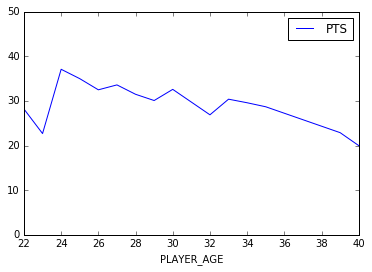

In [72]:
df.plot(x='PLAYER_AGE', y='PTS', ylim=(0,50))

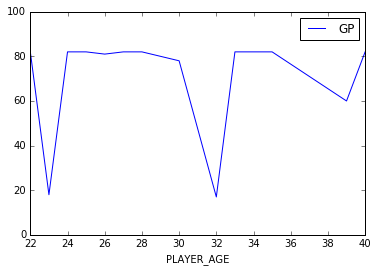

In [74]:
df.plot(x='PLAYER_AGE', y='GP', ylim=(0,100))

In [76]:
mj_bio_url = 'http://stats.nba.com/stats/commonplayerinfo?LeagueID=00&PlayerID=893&SeasonType=Regular+Season'
response = requests.get(mj_bio_url)
response.raise_for_status()
content = response.json() 

In [81]:
len(content['resultSets'])

2

In [86]:
def resultset_as_dataframe(res, return_name=False):
    """ convert resultset as pandas.DataFrame
    """
    from pandas import DataFrame
    header = res['headers']
    df = DataFrame(res['rowSet'])
    df.columns = header
    if return_name:
        source_name = res['name']
        return (df, source_name)
    else:
        return df

In [87]:
resultset_as_dataframe(content['resultSets'][0])

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,...,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER
0,893,Michael,Jordan,Michael Jordan,"Jordan, Michael",M. Jordan,1963-02-17T00:00:00,North Carolina,USA,North Carolina ''84/US,...,wizards,Washington,HISTADD_michael_jordan,1984,2002,N,Y,1984,1,3


In [88]:
resultset_as_dataframe(content['resultSets'][1])

,PLAYER_ID,PLAYER_NAME,TimeFrame,PTS,AST,REB,ALL_STAR_APPEARANCES
0,893,Michael Jordan,career,30.1,5.3,6.2,13


In [90]:
resultset_as_dataframe(content_json['resultSets'][0], True)[0]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,893,1984-85,00,1610612741,CHI,22.0,82,82,38.3,10.2,...,0.845,2.0,4.5,6.5,5.9,2.4,0.8,3.5,3.5,28.2
1,893,1985-86,00,1610612741,CHI,23.0,18,7,25.1,8.3,...,0.840,1.3,2.3,3.6,2.9,2.1,1.2,2.5,2.6,22.7
2,893,1986-87,00,1610612741,CHI,24.0,82,82,40.0,13.4,...,0.857,2.0,3.2,5.2,4.6,2.9,1.5,3.3,2.9,37.1
3,893,1987-88,00,1610612741,CHI,25.0,82,82,40.4,13.0,...,0.841,1.7,3.8,5.5,5.9,3.2,1.6,3.1,3.3,35.0
4,893,1988-89,00,1610612741,CHI,26.0,81,81,40.2,11.9,...,0.850,1.8,6.2,8.0,8.0,2.9,0.8,3.6,3.0,32.5
5,893,1989-90,00,1610612741,CHI,27.0,82,82,39.0,12.6,...,0.848,1.7,5.1,6.9,6.3,2.8,0.7,3.0,2.9,33.6
6,893,1990-91,00,1610612741,CHI,28.0,82,82,37.0,12.1,...,0.851,1.4,4.6,6.0,5.5,2.7,1.0,2.5,2.8,31.5
7,893,1991-92,00,1610612741,CHI,29.0,80,80,38.8,11.8,...,0.832,1.1,5.3,6.4,6.1,2.3,0.9,2.5,2.5,30.1
8,893,1992-93,00,1610612741,CHI,30.0,78,78,39.3,12.7,...,0.837,1.7,5.0,6.7,5.5,2.8,0.8,2.7,2.4,32.6
9,893,1994-95,00,1610612741,CHI,32.0,17,17,39.3,9.8,...,0.801,1.5,5.4,6.9,5.3,1.8,0.8,2.1,2.8,26.9


In [98]:
mj_award_url = 'http://stats.nba.com/stats/playerawards?PlayerID=893'
response = requests.get(mj_award_url)
response.raise_for_status()
awards_json = response.json() 

In [102]:
resultset_as_dataframe(awards_json['resultSets'][0])

,PERSON_ID,FIRST_NAME,LAST_NAME,TEAM,DESCRIPTION,ALL_NBA_TEAM_NUMBER,SEASON,MONTH,WEEK,CONFERENCE,TYPE,SUBTYPE1,SUBTYPE2,SUBTYPE3
0,893,Michael,Jordan,Chicago Bulls,NBA Player of the Month,None,1987-88,11/01/1987,None,None,Award,Kia Motors,KIPMO,None
1,893,Michael,Jordan,Chicago Bulls,All-NBA,1,1991-92,None,None,1610612741,Award,Kia Motors,KIANT,None
2,893,Michael,Jordan,Chicago Bulls,NBA Player of the Month,None,1992-93,11/01/1992,None,None,Award,Kia Motors,KIPMO,None
3,893,Michael,Jordan,Chicago Bulls,All-Defensive Team,1,1988-89,None,None,1610612741,Award,Kia Motors,KIADT,None
4,893,Michael,Jordan,Chicago Bulls,IBM Award,None,1988-89,None,None,None,Award,IBM,IBMAW,None
5,893,Michael,Jordan,Chicago Bulls,NBA Player of the Month,None,1989-90,12/01/1989,None,None,Award,Kia Motors,KIPMO,None
6,893,Michael,Jordan,Chicago Bulls,All-NBA,1,1997-98,None,None,1610612741,Award,Kia Motors,KIANT,None
7,893,Michael,Jordan,Chicago Bulls,All-Defensive Team,1,1990-91,None,None,1610612741,Award,Kia Motors,KIADT,None
8,893,Michael,Jordan,Chicago Bulls,NBA Player of the Month,None,1990-91,04/01/1991,None,None,Award,Kia Motors,KIPMO,None
9,893,Michael,Jordan,Chicago Bulls,NBA Player of the Week,None,1992-93,None,1992-11-22T00:00:00,None,Award,Kia Motors,KIPWK,None


In [107]:
player_url = 'http://stats.nba.com/stats/commonallplayers?IsOnlyCurrentSeason=0&LeagueID=00&Season=1993-94'
response = requests.get(player_url)
response.raise_for_status
players_json = response.json()

In [111]:
player_df = resultset_as_dataframe(players_json['resultSets'][0])

In [112]:
player_df.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,1,1990,1994,HISTADD_alaa_abdelnaby,1610612738,Boston,Celtics,BOS,celtics,Y
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,1,1990,2000,HISTADD_mahmoud_abdul-rauf,1610612743,Denver,Nuggets,DEN,nuggets,Y
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y


In [122]:
player_df[player_df['DISPLAY_FIRST_LAST'] == 'James Harden']

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
1486,201935,"Harden, James",James Harden,0,2009,2016,james_harden,0,,,,,Y


In [127]:
player_url = 'http://stats.nba.com/stats/commonallplayers?IsOnlyCurrentSeason=0&LeagueID=00&Season=2016-17'
response = requests.get(player_url)
response.raise_for_status
players_json = response.json()
player_df_2017 = resultset_as_dataframe(players_json['resultSets'][0])

In [129]:
import os
from os.path import join

outfile_path = join(os.getcwd(), 'data', 'all_player_table.csv')
player_df_2017.to_csv(outfile_path, header=True, sep=',')

In [130]:
player_df_2017.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,HISTADD_mahmoud_abdul-rauf,0,,,,,Y
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y


In [132]:
players = ['Michael Jordan', 'LeBron James', 'James Harden', 'Kobe Bryant']
player_df_2017[player_df_2017['DISPLAY_FIRST_LAST'].isin(players)]

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
479,977,"Bryant, Kobe",Kobe Bryant,0,1996,2015,kobe_bryant,0,,,,,Y
1486,201935,"Harden, James",James Harden,1,2009,2016,james_harden,1610612745,Houston,Rockets,HOU,rockets,Y
1784,2544,"James, LeBron",LeBron James,1,2003,2016,lebron_james,1610612739,Cleveland,Cavaliers,CLE,cavaliers,Y
1938,893,"Jordan, Michael",Michael Jordan,0,1984,2002,HISTADD_michael_jordan,0,,,,,Y
